In [1]:
# Import libraries and load dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load dataset (adjust path if local or GitHub raw link)
df = pd.read_csv("software_engineers_employment_dataset_cleaned.csv")

# Preview
df.head()

,AGE,SEX,RACE,EDUC,OCC2010,IND,EMPSTAT,UHRSWORK,INCWAGE,weekly_earnings
0,31,1,1,10,1020,7390,1,40,113000,2173.08
1,46,1,1,10,1020,7380,1,40,94000,1807.69
2,29,1,1,10,1020,7380,1,40,110000,2115.38
3,32,1,1,11,1020,7380,1,40,60000,1153.85
4,39,1,1,10,1020,7380,1,42,128000,2461.54


In [7]:
# Cell: Summary statistics by race (no education split)
race_summary = df.groupby("RACE")["weekly_earnings"].agg(
    ["mean", "median", "std", "count"]
)
# Map race (shortened labels for clarity)
race_map = {
    1: "White",
    2: "Black",
    3: "Amer. Indian/Alaska Native",
    4: "Chinese",
    5: "Japanese",
    6: "Other Asian/Pacific Islander",
    7: "Other race",
    8: "Two races",
    9: "Three+ races",
}

df["RACE"] = df["RACE"].map(race_map)
race_summary

,mean,median,std,count
RACE,,,,
1,2563.187648,2115.38,1951.006093,13990
2,2002.613329,1826.92,1413.482390,841
3,2050.595493,1730.77,1852.271628,71
4,3306.431083,2884.62,2387.583929,2374
5,2854.296383,2307.69,2434.859196,94
6,2606.199203,2307.69,1818.514570,7957
7,2275.164692,1923.08,1886.024573,584
8,2386.028814,2115.38,1743.326715,1864
9,2215.497807,2211.54,1160.331988,187


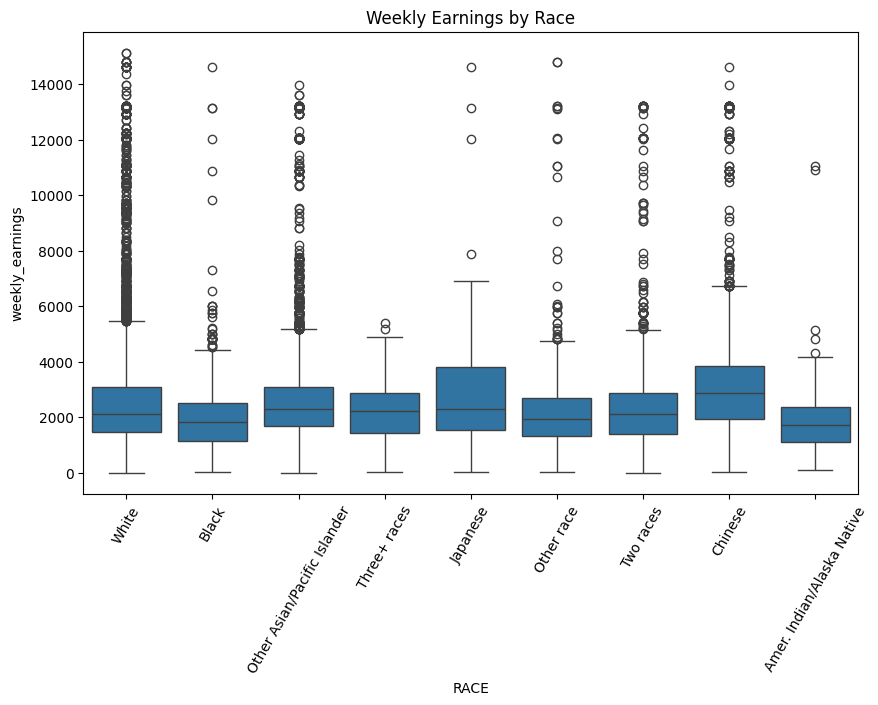

In [10]:
# Boxplot of wages by race
plt.figure(figsize=(10, 6))
sns.boxplot(x="RACE", y="weekly_earnings", data=df)
plt.title("Weekly Earnings by Race")
plt.xticks(rotation=60)
plt.show()

In [11]:
from scipy import stats

# Create a list of arrays, one for each race
race_groups = [group["weekly_earnings"].values for name, group in df.groupby("RACE")]

f_stat, p_val = stats.f_oneway(*race_groups)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

F-statistic: 57.58, p-value: 0.0000


### ANOVA Test Interpretation (Race vs Weekly Earnings)

- **F-statistic = 57.58** → Indicates that there are differences in average 
  weekly earnings between at least one pair of race groups. A higher 
  F-statistic means that the variation between group means is much larger 
  than the variation within groups.

- **p-value = 0.0000** → Effectively **p < 0.001**, meaning there is an 
  extremely low probability that these observed differences are due to 
  random chance.

#### Conclusion
- There are **statistically significant differences** in mean weekly 
  earnings across race groups.
- This result does not specify which specific race groups differ; it only 
  confirms that **at least one** group’s average earnings are different 
  from the others.
- Further analysis (e.g., regression coefficients or pairwise comparisons) 
  is needed to determine **which groups** differ and by how much.


In [12]:
model_race = smf.ols("weekly_earnings ~ C(RACE)", data=df).fit()
print(model_race.summary())

                            OLS Regression Results                            
Dep. Variable:        weekly_earnings   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     57.58
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.22e-93
Time:                        18:47:57   Log-Likelihood:            -2.5113e+05
No. Observations:               27962   AIC:                         5.023e+05
Df Residuals:                   27953   BIC:                         5.024e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

## Race and Weekly Earnings 

### Model Fit
- **R-squared = 0.016** → Race alone explains about **1.6%** of the variation in weekly earnings.
- **F-statistic = 57.58, p < 0.001** → The model is statistically significant overall, meaning there are differences in mean earnings across racial groups.

### Coefficients and Interpretation
- **Intercept (2050.60)** → Baseline average weekly earnings for the reference group (race not explicitly listed but typically "American Indian or Alaska Native" in this encoding).
- **Chinese: +1255.84 (p < 0.001)** → Chinese workers earn, on average, **$1,256 more per week** than the baseline group.
- **Japanese: +803.70 (p = 0.008)** → Japanese workers earn about **$804 more per week**, statistically significant.
- **Other Asian/Pacific Islander: +555.60 (p = 0.015)** → Earn about **$556 more per week**, statistically significant.
- **White: +512.59 (p = 0.025)** → White workers earn about **$513 more per week**, statistically significant.
- **Black: -47.98 (p = 0.840)** → Slightly lower, but **not statistically significant**.
- **Other race, Two races, Three+ races** → Differences are **not statistically significant**.

### Key Insights
- **Chinese, Japanese, Other Asian/Pacific Islander, and White groups** show **significantly higher earnings** compared to the baseline.
- **Black workers** and multi-racial categories (Two races, Three+ races, Other race) show no statistically significant difference.
- **Race explains only a small portion of earnings variation (R² = 0.016)**, meaning other factors (education, gender, experience, industry) are stronger determinants of wages.

### Conclusion
- There are **statistically significant differences** in average weekly earnings across some race groups.
- The largest positive difference is for **Chinese workers** (+$1,256/week), followed by **Japanese** and **Other Asian/Pacific Islander**.
- However, **race alone is not a strong predictor of earnings**, highlighting the need to include education, gender, and other factors in future models.
